In [1]:
import pandas as pd
import numpy as np
import math
from random import gauss
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

In [2]:
# Option Call
#Les paramètres sont :
#r: taux d’intéret bancaire, 
#sigma: la volatilité, 
#strike: prix visé
#S0: la valeur initiale de l'actif
#C0: le prix initial du contrat , à déterminer 
#shares : nombre de parts achetées dans le contrat
#mu: gain attendu

mu = 0.05
S0 = 1 
strike = 1.2
sigma = 0.25
r = 0.02
shares = 500 


In [3]:
# Pricing du contrat par MonteCarlo
N = 1000000 # Echantillonage

normal = np.random.normal(0,1,N)
S1 = np.exp(r-sigma**2/2+sigma*normal)
C0 = np.mean(shares * np.maximum(0, S1-strike))*math.exp(-r)
print("Le prix intial du contrat doit être: ",C0)

Le prix intial du contrat doit être:  20.96581000478644


In [4]:
# Réglages graphiques


sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

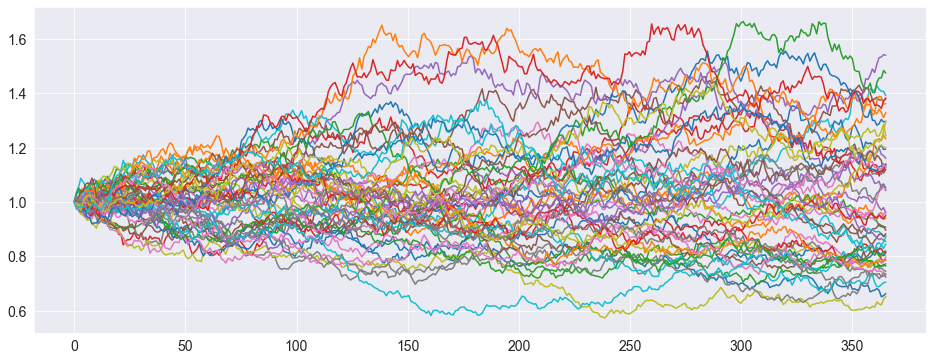

In [5]:
# Simulation par MonteCarlo de l'évolution du prix de l'actif
 

duree = 365 #durée
dt = 1/duree
N_realisations = 50
t = np.linspace(0,duree,duree) 

S = np.zeros([N_realisations,duree])
S[:,0] = S0
for j in range(0, duree-1):
    S[:,j+1] = S[:,j]*np.exp( sigma*np.random.normal(0,1, N_realisations)*np.sqrt(dt)+(mu-sigma**2/2)*dt )
for i in range(0,N_realisations):
    plt.plot(t,S[i,:])
plt.show()